# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
df = pd.read_csv('housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
X = df.drop('median_house_value', axis=1) 
y = df['median_house_value']

In [4]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [5]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [8]:
X = pd.get_dummies(X, drop_first = True)
print(df.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

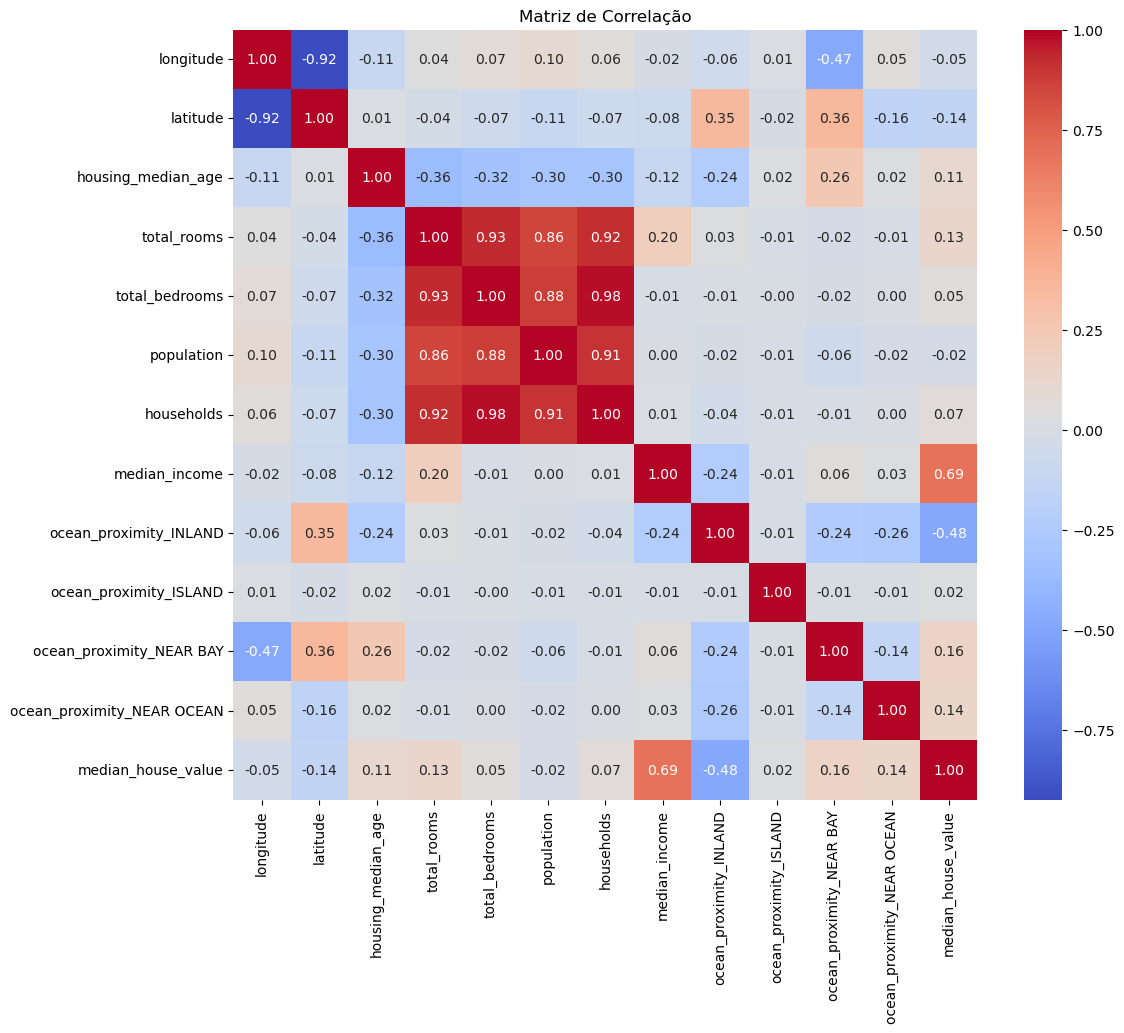

In [9]:
# Concatenando as variáveis explicativas e a variável de resposta para criar a matriz de correlação
data_with_target = pd.concat([X, y], axis=1)

# Calculando a matriz de correlação
correlation_matrix = data_with_target.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

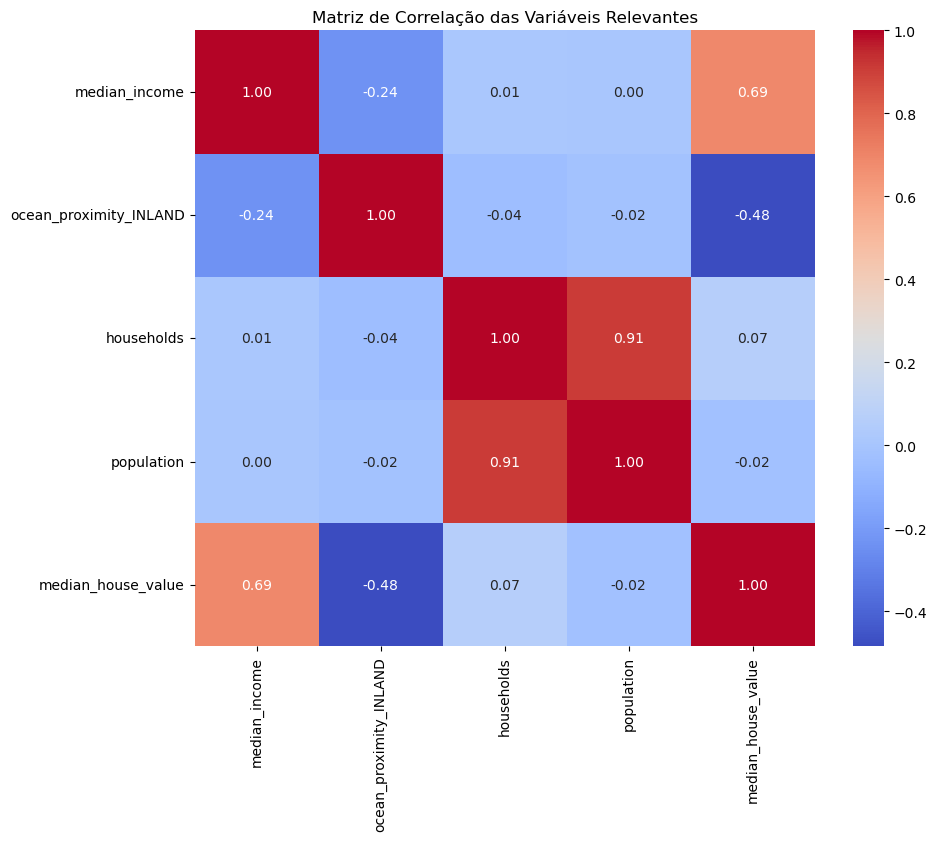

In [10]:
relevant_columns = ['median_income', 'ocean_proximity_INLAND', 'households', 'population', 'median_house_value']
data_with_target_relevant = data_with_target[relevant_columns]


correlation_matrix_relevant = data_with_target_relevant.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes")
plt.show()

Median_income tem uma relação positiva considerável com median_house_value
ocean_proximity_INLAND tem uma relação negativa com median_house_value

### 3. Separe os dados em validação e teste

In [11]:
X = data_with_target_relevant.drop(columns=['median_house_value'])
y = data_with_target_relevant['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treinamento (validação):", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento (validação): 14448
Tamanho do conjunto de teste: 6192


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=8, random_state=42)

In [13]:
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [14]:
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

y_pred_train_max_depth_8 = tree_max_depth_8.predict(X_train)
mse_train_max_depth_8 = mean_squared_error(y_train, y_pred_train_max_depth_8)

y_pred_test_max_depth_8 = tree_max_depth_8.predict(X_test)
mse_test_max_depth_8 = mean_squared_error(y_test, y_pred_test_max_depth_8)

y_pred_train_max_depth_2 = tree_max_depth_2.predict(X_train)
mse_train_max_depth_2 = mean_squared_error(y_train, y_pred_train_max_depth_2)

y_pred_test_max_depth_2 = tree_max_depth_2.predict(X_test)
mse_test_max_depth_2 = mean_squared_error(y_test, y_pred_test_max_depth_2)
# Exibindo os resultados
print("MSE da árvore com profundidade máxima 8 - Treinamento: {:.2f}".format(mse_train_max_depth_8))
print("MSE da árvore com profundidade máxima 8 - Teste: {:.2f}".format(mse_test_max_depth_8))
print()
print("MSE da árvore com profundidade máxima 2 - Treinamento: {:.2f}".format(mse_train_max_depth_2))
print("MSE da árvore com profundidade máxima 2 - Teste: {:.2f}".format(mse_test_max_depth_2))

MSE da árvore com profundidade máxima 8 - Treinamento: 4038801188.66
MSE da árvore com profundidade máxima 8 - Teste: 5278670017.31

MSE da árvore com profundidade máxima 2 - Treinamento: 6738407726.39
MSE da árvore com profundidade máxima 2 - Teste: 6725309134.25


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 apresenta um MSE de treinamento significativamente menor (4.038.801.188,66) em comparação com a árvore de profundidade 2 (673.840.7726,39). Isso indica que a árvore de profundidade 8 se ajusta melhor aos dados de treinamento.

No entanto, quando observamos o MSE de teste, a árvore de profundidade 2 (672.530.9134,25) apresenta um valor menor que a árvore de profundidade 8 (527.867.0017,31). Isso significa que a árvore de profundidade 2 generaliza melhor para novos dados não vistos durante o treinamento.

Embora a árvore de profundidade 8 tenha um melhor desempenho no treinamento, a árvore de profundidade 2 é a escolha mais adequada devido ao seu menor MSE de teste.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

[Text(0.5, 0.8333333333333334, 'median_income <= 5.032\nsquared_error = 13396959774.719\nsamples = 14448\nvalue = 206923.961'),
 Text(0.25, 0.5, 'ocean_proximity_INLAND <= 0.5\nsquared_error = 8347041372.113\nsamples = 11340\nvalue = 172966.3'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8213678620.786\nsamples = 7206\nvalue = 207762.441'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2790174041.519\nsamples = 4134\nvalue = 112312.941'),
 Text(0.75, 0.5, 'median_income <= 6.868\nsquared_error = 12263894213.433\nsamples = 3108\nvalue = 330823.533'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9035888579.764\nsamples = 2201\nvalue = 291805.786'),
 Text(0.875, 0.16666666666666666, 'squared_error = 7437901254.397\nsamples = 907\nvalue = 425507.173')]

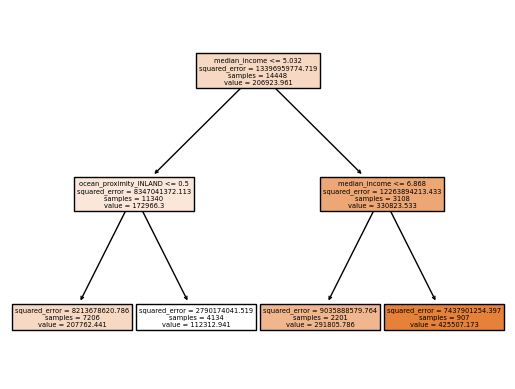

In [15]:
feature_names = X.columns.tolist()
plot_tree(tree_max_depth_2, feature_names=feature_names, filled=True)

A variável median_income parece conseguir dividir melhor os registros em diferentes grupos, indicando ser uma variável mais influente na determinação das previsões iniciais da árvore.